In [2]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import shap

In [7]:
# Loading the dataset
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Selecting features
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',  'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',  'PoolArea', 'YrSold']
X_train = train_dataset[features]
y_train = train_dataset["SalePrice"]
X_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,...,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,YrSold
0,8450,7,5,2003,2003,706,0,856,856,0,...,1,3,0,2,548,0,61,0,0,2008
1,9600,6,8,1976,1976,978,0,1262,1262,0,...,0,3,1,2,460,298,0,0,0,2007
2,11250,7,5,2001,2002,486,0,920,920,0,...,1,3,1,2,608,0,42,0,0,2008
3,9550,7,5,1915,1970,216,0,756,961,0,...,0,3,1,3,642,0,35,272,0,2006
4,14260,8,5,2000,2000,655,0,1145,1145,0,...,1,4,1,3,836,192,84,0,0,2008


In [11]:
X_test = test_dataset[features]

In [12]:
# Training regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
# Initializing the SHAP explainer object with the trained model and the training data
explainer = shap.Explainer(model, X_train)

In [14]:
# Calculating the SHAP values for the test data
shap_values = explainer(X_test)

 99%|===================| 1446/1459 [01:09<00:00]       

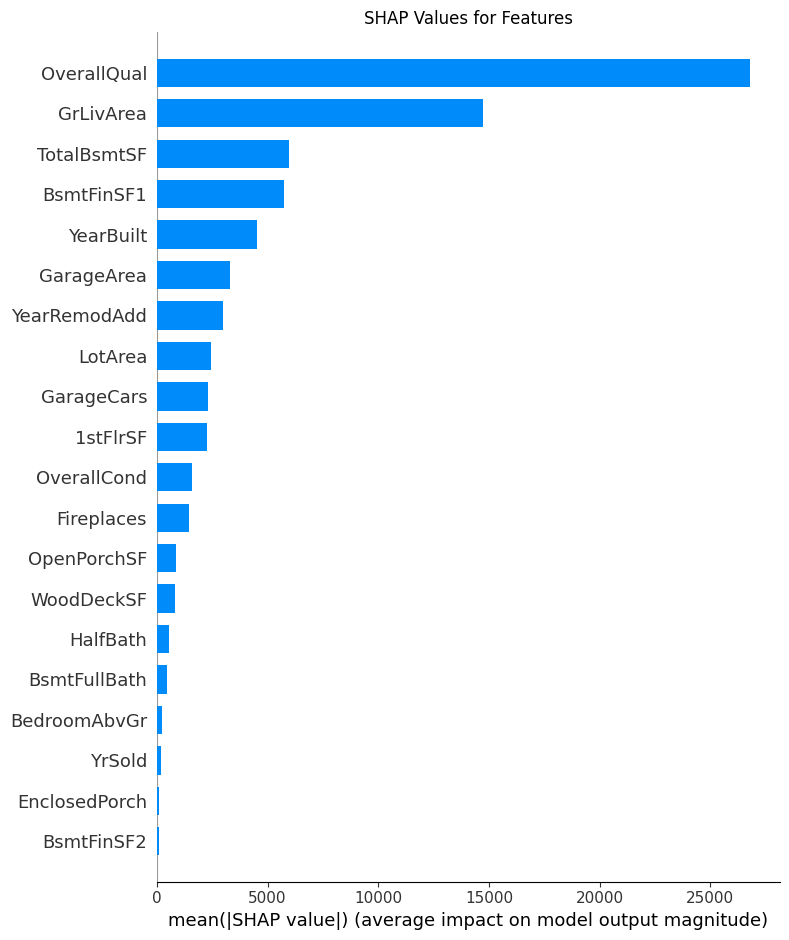

In [15]:
# Visualizing the SHAP values for the features
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.title("SHAP Values for Features")
plt.tight_layout()
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


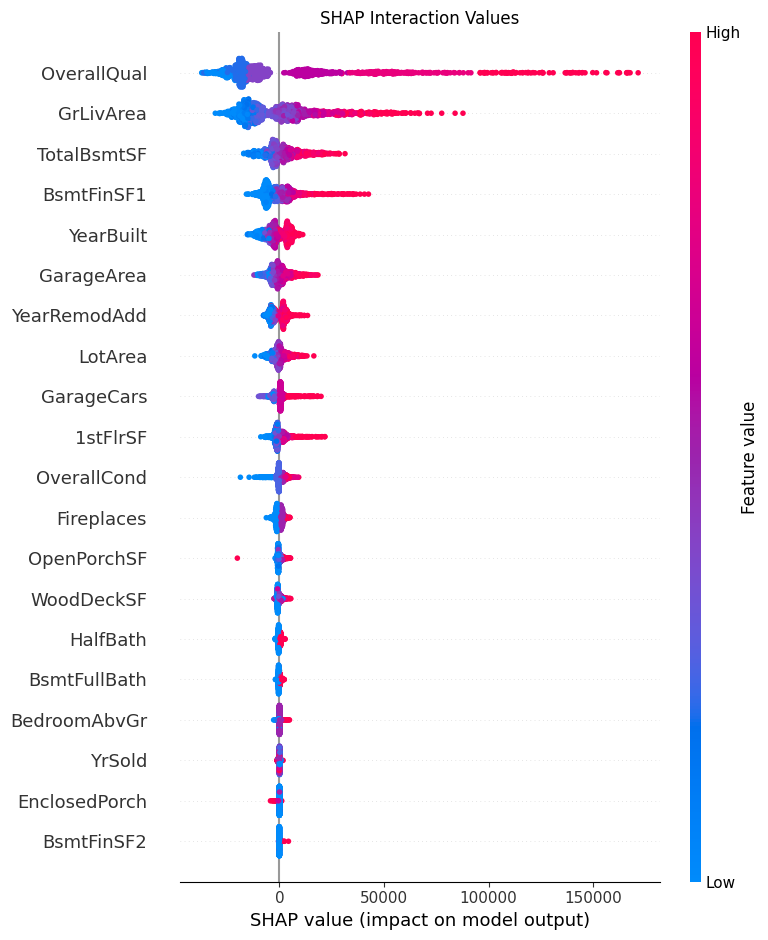

In [16]:
# Visualizing the SHAP interaction values for the features
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Interaction Values")
plt.tight_layout()
plt.show()